# <center>VISUALIZING A CRUDE OIL TIME SERIES</center>

## This article details some very basic time series analysis methods using the Python programming language.  I will show how to use an API to download data from the web for use in a Jupyter notebook.

## Retrieve Data From Quandl Data Feed

### For this example, we will look at crude oil prices and observe the variation in price over the years. Our first plot will display a price and volume chart. Data will come from the Quandl.com website.  Quandl is a site that contains financial data that is obtained from a myriad of sources.  They have a few sets of free data and also a paid premium membership with more extensive datasets.  Quandl has an API available to make it very easy to download data for analysis.  An API key can be obtained by registering on their website.

### First, we will connect to Quandl with our API key and download the front month of the WTI Crude Oil (Continuous) Futures contract.  We will check the start and end of our file to make sure the data appears as we expect it to.

In [1]:
import quandl
QUANDL_API_KEY = '(Insert your Quandl API Key Here)'
quandl.ApiConfig.api_key = QUANDL_API_KEY
df = quandl.get('CHRIS/CME_CL1')

In [2]:
df.head()

,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest
Date,,,,,,,,
1983-03-30,29.01,29.56,29.01,29.40,NaN,29.40,949.0,470.0
1983-03-31,29.40,29.60,29.25,29.29,NaN,29.29,521.0,523.0
1983-04-04,29.30,29.70,29.29,29.44,NaN,29.44,156.0,583.0
1983-04-05,29.50,29.80,29.50,29.71,NaN,29.71,175.0,623.0
1983-04-06,29.90,29.92,29.65,29.90,NaN,29.90,392.0,640.0


In [3]:
df.tail()

,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest
Date,,,,,,,,
2019-11-22,58.31,58.74,57.50,57.93,0.81,57.77,498426.0,476262.0
2019-11-25,57.92,58.15,57.21,57.91,0.24,58.01,418036.0,472791.0
2019-11-26,57.92,58.56,57.76,58.32,0.40,58.41,438420.0,468297.0
2019-11-27,58.27,58.68,57.51,58.14,0.30,58.11,449969.0,468393.0
2019-11-29,58.13,58.30,55.02,55.42,2.94,55.17,716575.0,456055.0


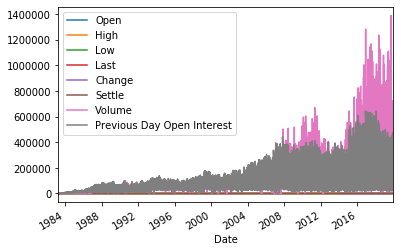

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

df.plot();

### The above plot is very cluttered and does not really show any useful information.  When there are no parameters specified in the plot command, all of the columns from the DataFrame are plotted together.  We can separate the data that we want by assigning variables to the specific data that we want to plot (note that the prices and volumes variables are pandas Series data type objects):

In [5]:
prices = df['Last']
volumes = df['Volume']

In [6]:
prices.head()

Date
1983-03-30    29.40
1983-03-31    29.29
1983-04-04    29.44
1983-04-05    29.71
1983-04-06    29.90
Name: Last, dtype: float64

In [7]:
volumes.tail()

Date
2019-11-22    498426.0
2019-11-25    418036.0
2019-11-26    438420.0
2019-11-27    449969.0
2019-11-29    716575.0
Name: Volume, dtype: float64

In [8]:
type(prices)

pandas.core.series.Series

In [9]:
type(volumes)

pandas.core.series.Series

### Now we plot the WTI Closing Price and the Daily Trading Volumes on the following chart.

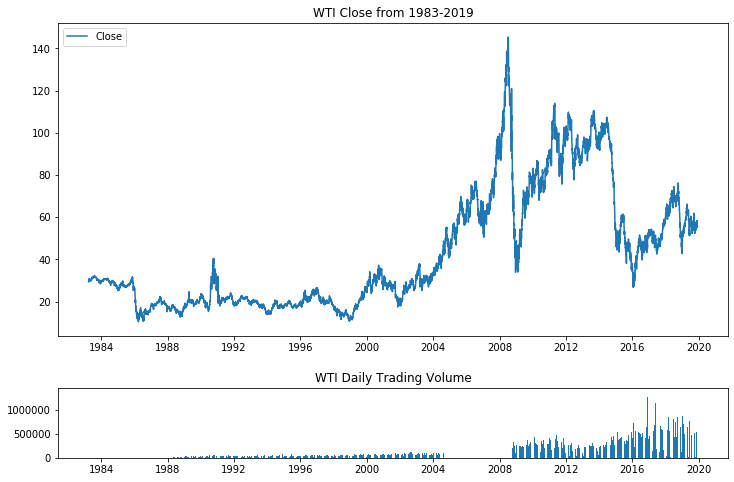

In [10]:
# The top plot shows closing price (Daily)
top = plt.subplot2grid((4,4), (0,0), rowspan=3, colspan=4)
top.plot(prices.index, prices, label='Close')
plt.title('WTI Close from 1983-2019')
plt.legend(loc=2)

# The bottom plot shows trading volume (Daily)
bottom = plt.subplot2grid((4,4), (3,0), rowspan=1, colspan=4)
bottom.bar(volumes.index, volumes)
plt.title('WTI Daily Trading Volume')

plt.gcf().set_size_inches(12,8)
plt.subplots_adjust(hspace=0.75)

### We can also plot this time series in candlestick charts using mpl-finance package. The following code also shows how we can select start and end dates for our chart.  I thought this was an interesting time period because the current price of WTI is in the mid 50's range and many analysts are declaring this price to be relatively stable.  However, the following chart shows that it is possible for prices to tumble even lower and perhaps the 50 dollar price might not really be a level of resistance! Recent attacks on the Saudi Arabia oil infrastructure cause a temporary price spike but then prices quickly returned to their previous levels.  It may be that another event in the opposite direction (such as Saudi Arabia increasing production to maximum levels and flooding the crude oil market) could cause a much more severe shock to the downside.  This would indicate that the  50 dollar level could become a zone of resistance.  This could be catastrophic to the US oil and gas industry. A price environment in the 40's and 30's so soon after the 2015-2016 environment might be the cause of a permanent setback for smaller and midsize oil companies.

### We also plot the daily returns and cumulative returns of this time series.  The describe() method givew the statistical summary of the price distribution.  We also show a histogram plot that tells us how distributed the daily returns are.

In [53]:
pip install mpl-finance;

Note: you may need to restart the kernel to use updated packages.


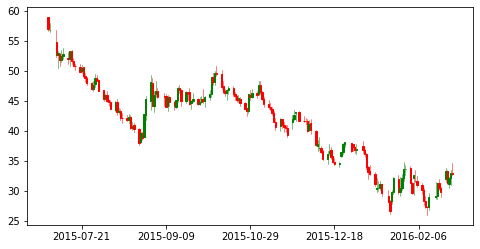

In [12]:
%matplotlib inline
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mdates
import matplotlib.pyplot as plt

quandl.ApiConfig.api_key = QUANDL_API_KEY
df_subset = quandl.get('CHRIS/CME_CL1',
                      start_date='2015-07-01',
                      end_date='2016-02-28')

df_subset['Date'] = df_subset.index.map(mdates.date2num)
df_ohlc = df_subset[['Date', 'Open', 'High', 'Low', 'Last']]

figure, ax = plt.subplots(figsize = (8,4))
formatter = mdates.DateFormatter('%Y-%m-%d')
ax.xaxis.set_major_formatter(formatter)
candlestick_ohlc(ax,
                df_ohlc.values,
                width=0.8,
                colorup='green',
                colordown='red')

plt.show()

,Last
count,9215.000000
mean,0.000352
std,0.023737
min,-0.330000
25%,-0.010729
50%,0.000385
75%,0.011668
max,0.178329


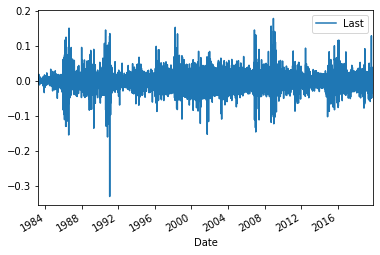

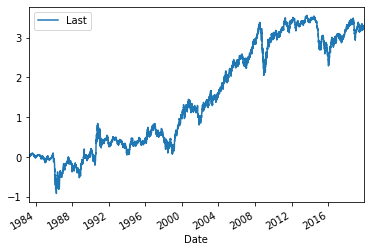

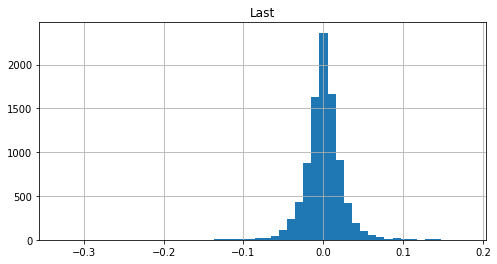

In [13]:
%matplotlib inline
import quandl

quandl.ApiConfig.api_key = QUANDL_API_KEY
df = quandl.get('CHRIS/CME_CL1.4')
# The above line could also be written as: df = quandl.get('CHRIS/CME_CL1', column_index=4)

daily_changes = df.pct_change(periods=1)
daily_changes.plot();

df_cumsum = daily_changes.cumsum()
df_cumsum.plot();

daily_changes.hist(bins=50, figsize=(8, 4));

daily_changes.describe()

### A visualization of the rolling volatility gives us insight as to the how the standard deviation has changed over time. Here the following plot shows a 30 day rolling period, which is a general approximation of the monthly standard deviation of returns.  For any missing values the method parameter of 'ffill' means that the last observation is carried forward.

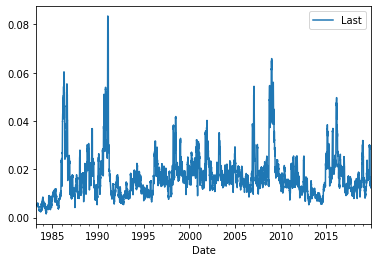

In [17]:
%matplotlib inline 
import quandl

quandl.ApiConfig.api_key = QUANDL_API_KEY 
df = quandl.get('CHRIS/CME_CL1.4')

df_filled = df.asfreq('D', method = 'ffill')
df_returns = df_filled.pct_change()
df_std = df_returns.rolling(window=30, min_periods=30).std()
df_std.plot()

### Next we will look at a Q-Q (quantile-quantile) plot.  This is a probability plot in which the quantiles of two different distributions are plotted against each other.  If the distributions are related linearly, the points on the plot will fall along a line.  Points that do not fall along a line give indications of positive/negative skews, and excess kurtosis. The below plot shows that the data is generally correlated between +/- 2 quantiles.  Outside of the +/- 2 quantile regions there are increasing values away from correlation showing  more skewness at the tails.

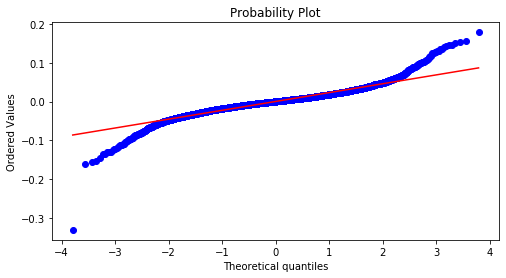

In [20]:
%matplotlib inline 
import quandl
from scipy import stats
from scipy.stats import probplot

quandl.ApiConfig.api_key = QUANDL_API_KEY 
df = quandl.get('CHRIS/CME_CL1.4')
daily_changes = df.pct_change(periods=1).dropna()

figure = plt.figure(figsize=(8,4))
ax = figure.add_subplot(111)
stats.probplot(daily_changes['Last'], dist = 'norm', plot = ax)
plt.show();

### It is also possible to download several time series at the same time using the Quandl API.  The following code block illustrates how to data download WTI, Brent, and Dubai Crude time series data.

### Given a series of multiple datasets, it is possible to determine how closely a series has a linear relationship with another.  This is a statistical property called correlation.  A correlation of 1 means that two variables have a perfect correlation, while a correlation of -1 means that they are perfectly inverse of each other.  A correlation of 0 means that there is no relationship between two time series.

### We also output the correlation matrix of the return series.  This matrix shows that WTI and Brent are highly correlated, but WTI and Dubai Crude are much less correlated.

,CHRIS/CME_CL1 - Last,CHRIS/CME_BB1 - Last,CHRIS/CME_DC1 - Last
CHRIS/CME_CL1 - Last,1.000000,0.850701,0.479819
CHRIS/CME_BB1 - Last,0.850701,1.000000,0.730466
CHRIS/CME_DC1 - Last,0.479819,0.730466,1.000000


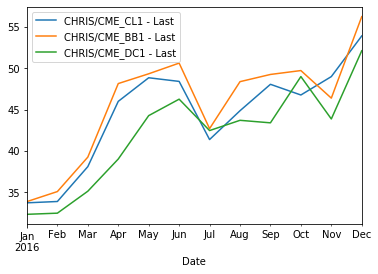

In [34]:
%matplotlib inline 
import quandl

quandl.ApiConfig.api_key = QUANDL_API_KEY 
df = quandl.get(['CHRIS/CME_CL1.4',
                 'CHRIS/CME_BB1.4',
                 'CHRIS/CME_DC1.4'],
               collapse='monthly',
               start_date='2016-01-01',
               end_date='2016-12-31')

df.plot();





### Let's take a closer look at the correlation between WTI and Dubai Crude.  We use the rolling() method to show the correlation between WTI and Dubai Crude during the latter part of 2016 when the price of WTI Crude dropped from 50/BBL down to the 30's and 40's.

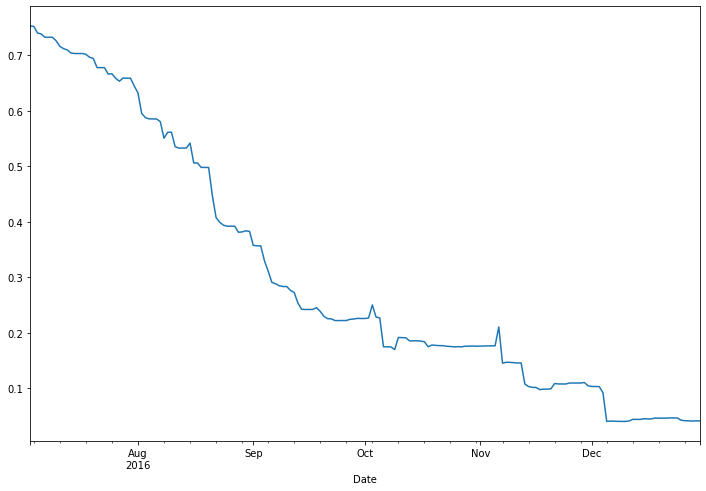

In [42]:
%matplotlib inline 
import quandl

quandl.ApiConfig.api_key = QUANDL_API_KEY 
df = quandl.get(['CHRIS/CME_CL1.4',
                 'CHRIS/CME_DC1.4'],
               start_date='2016-01-01',
               end_date='2016-12-31')

df.pct_change().corr()
df_filled = df.asfreq('D', method='ffill')
daily_changes=df_filled.pct_change()
wti_returns = daily_changes['CHRIS/CME_CL1 - Last']
dc_returns = daily_changes['CHRIS/CME_DC1 - Last']
window = int(len(df_filled.index)/2)
df_corrs = wti_returns.rolling(window=window, min_periods=window).corr(other=dc_returns).dropna()

df_corrs.plot(figsize=(12,8));

### One of the simplest technical indicators for time series data is the moving average.  An "n-period" Simple Moving Average (SMA) is the average of prices over the past "n" periods.  The below chart shows a "short" 5 day moving average compared to a "long" 30 day moving average.  The crossover points of the "long" and "short" moving averages are sometimes helpful in identifying trends and price reversals.

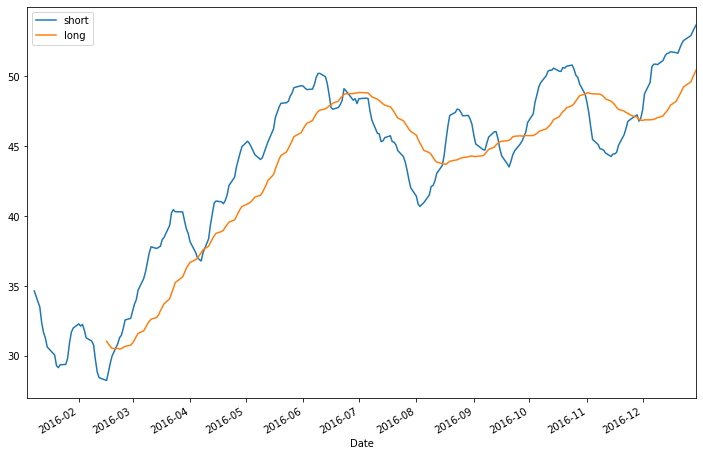

In [47]:
%matplotlib inline 
import quandl
import pandas as pd

quandl.ApiConfig.api_key = QUANDL_API_KEY 
df = quandl.get('CHRIS/CME_CL1.4',
               start_date='2016-01-01',
               end_date='2016-12-31')

df_filled = df.asfreq('D', method = 'ffill')
df_last = df['Last']

series_short = df_last.rolling(window=5, min_periods=5).mean()
series_long = df_last.rolling(window=30, min_periods=30).mean()

df_sma = pd.DataFrame(columns=['short', 'long'])
df_sma['short'] = series_short
df_sma['long'] = series_long
df_sma.plot(figsize=(12, 8));


### A similar method that is used in time series analysis is the Exponential Moving Average (EMA). The EMA gives priority (higher weighting) to more recent prices and lesser weighting to older prices.  The weights are assigned according to an exponential basis.  Compare the below "short" 5 day / "long" 30 day EMA chart to the above SMA chart and you can see that they are similar.  However, the EMA chart reacts a little faster to price changes than does the SMA chart.

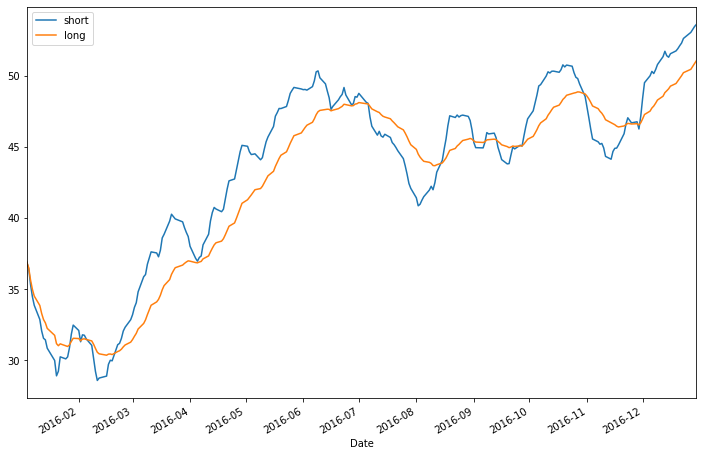

In [50]:
%matplotlib inline 
import quandl
import pandas as pd

quandl.ApiConfig.api_key = QUANDL_API_KEY 
df = quandl.get('CHRIS/CME_CL1.4',
               start_date='2016-01-01',
               end_date='2016-12-31')

df_filled = df.asfreq('D', method = 'ffill')
df_last = df['Last']

series_short = df_last.ewm(span=5).mean()
series_long = df_last.ewm(span=30).mean()

df_sma = pd.DataFrame(columns=['short', 'long'])
df_sma['short'] = series_short
df_sma['long'] = series_long
df_sma.plot(figsize=(12, 8));


### This has just been a short excercise in showing some of the basic techniques used for time series analysis.  Time series analysis is a fascinating topic that is used for financial data, but it is applicable to any process that generates data that can be measured on a time scale.

### My next article will investigate more advanced statistical analysis techniques with time series data.

##### Attribution: "Mastering Python for Finance, 2nd ed." by James Ma Weiming (Packt Publishing).  Copyright 2019: 978-1-78934-646-6